In [2]:
from si import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [4]:
fs = {"Default (2-3)":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_2_3.root"),
      "3-4":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root"),
      "4-5":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_4_5.root"),
      "6-8":r.TFile("./data/ADT_endgame/results_ADTscan_EndGame_June11_6_8.root")
     }

adt_params_low_ct = [2,3,4,6]

fs["3-4"].ls()

TFile**		./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root	
 TFile*		./data/ADT_endgame/results_ADTscan_EndGame_June11_3_4.root	
  KEY: TDirectoryFile	clusters;1	clusters (CaloHitPositions) folder


In [5]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [6]:
datasetfits = {}
datasetslopes = {}
datasetslopeErrs = {}
for name in fs:
    print("Starting", name)
    f = fs[name]
    allFitResults = {}
    slopes = []
    slopeErrs = []
    for calo in range(1,25):
        print("    Calo ", calo)
        #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        try:
            randclusters = f.Get("clusters/randclusters"+str(calo)).Clone()
        except:
            randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
        randclusters.Rebin3D(1,1,1)
        randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(1000),randclusters.GetYaxis().FindBin(2400))
        widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

        tlow = 30
        thigh = 300

        func,paramVec = fitfunc(1, [tlow,thigh]) 

        fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
        allFitResults["calo"+str(calo)] = fitresult
        slopes.append(fitresult.pars[1])
        slopeErrs.append(fitresult.parErrs[1])
        #break
    datasetfits[name] = allFitResults
    datasetslopes[name] = slopes
    datasetslopeErrs[name] = slopeErrs

Starting Default (2-3)
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 3-4
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 4-5
    Calo  1
    Calo  2
    Calo  3
    Calo  4
    Calo  5
    Calo  6
    Calo  7
    Calo  8
    Calo  9
    Calo  10
    Calo  11
    Calo  12
    Calo  13
    Calo  14
    Calo  15
    Calo  16
    Calo  17
    Calo  18
    Calo  19
    Calo  20
    Calo  21
    Calo  22
    Calo  23
    Calo  24
Starting 6-8
    Calo  1
    Calo  2
    C

In [7]:
print(datasetslopes)

{'Default (2-3)': [9.335967439623125e-05, 0.00010455356730117301, 0.00010087937133870861, 6.169896911617391e-05, 1.335514090024717e-05, -3.118151071481447e-05, -1.1408582423914079e-06, 7.609303557324971e-05, 0.00011279441024229321, 9.55645346534432e-05, 3.5670642624186736e-05, 7.143943146836966e-05, 0.00015312970502763488, 0.00016921020261845697, 0.00015559210963874413, 0.00016885244576870045, 0.00014569037084909427, 0.00017515457462860298, 0.00013927193595627958, 0.00010743077153033141, 0.00011279248019978079, 0.00012267590447396153, 0.00012421003990330948, 0.00014732491709752417], '3-4': [0.00014746055097800194, 0.00016215337763114018, 0.00015976267667859497, 0.00012424262994932558, 7.563104816257176e-05, 2.3812039600885334e-05, 5.169817236285844e-05, 0.0001287154365989432, 0.00016484722980624392, 0.00015007083953414905, 7.796266394518388e-05, 0.00011169018613887314, 0.00018752426472595253, 0.00021621422074462023, 0.00020274484019598726, 0.00021561461819243757, 0.00020390620498871118

For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


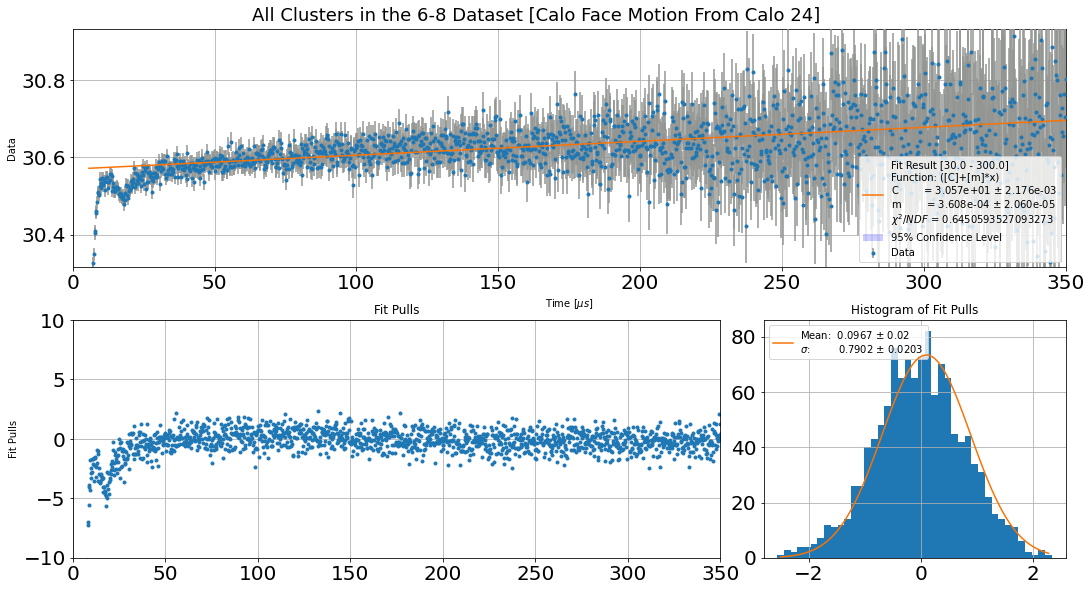

In [8]:
fig,ax = fitresult.draw("All Clusters in the "+name+" Dataset [Calo Face Motion From Calo "+str(calo)+"]", 
                        yrange=[None, [-10,10]], fmti=".")
#ax[0].set_ylim(-2,2)
#ax[0].set_xlim(0,50)
for i in range(2):
    ax[i].set_xlim(0,350)
ax[0].set_xlabel(r"Time [$\mu s$]")


plt.show()

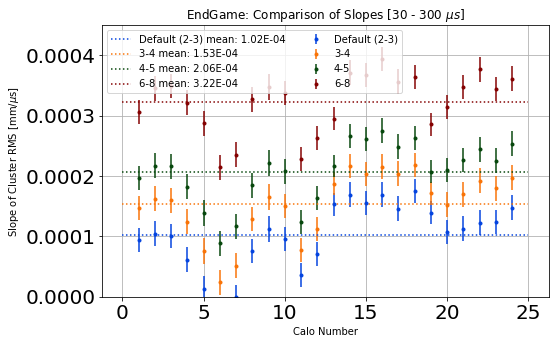

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:forest green', 'xkcd:dark red']
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    color=colors[i]
    plt.errorbar([x for x in range(1,25)], slopes, yerr=datasetslopeErrs[name], fmt=".",label=name, color=color)
    mean = np.mean(slopes)
    plt.plot([0,25], [mean,mean], ":", label=name+" mean: "+str(format(mean, "2.2E")), color=color)
#plt.errorbar([x for x in range(1,25)], slopes_eg, yerr=slopeErrs_eg, fmt=".",label="EndGame")
plt.grid()
plt.title(r"EndGame: Comparison of Slopes ["+str(tlow)+" - "+str(thigh)+r" $\mu s$]")
plt.xlabel("Calo Number")
plt.ylabel(r"Slope of Cluster RMS [mm/$\mu$s]")
plt.legend(ncol=2)
# fit.f.SetParameters(0.0001,0.00001, 0.25,0)
# fit.drawFitResult(ax)
plt.ylim(0,0.00045)
plt.show()

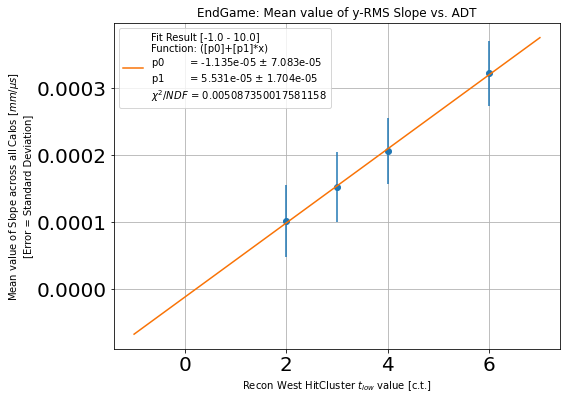

In [23]:
means = []
meanErrs = []
for i, name in enumerate(datasetslopes):
    slopes = datasetslopes[name]
    mean = np.mean(slopes)
    means.append(mean)
    meanErrs.append(np.std(slopes))
    
fig,ax = plt.subplots(figsize=(8,6))

plt.errorbar(adt_params_low_ct, means,yerr=meanErrs, fmt="o")
func = r.TF1("func","pol1",-1,10)
func.SetParameters(1,1)
fit = fitVector(adt_params_low_ct, means, func, yerr=meanErrs)
fit.drawFitResult(ax,100,xrange=[-1,7])

plt.title("EndGame: Mean value of y-RMS Slope vs. ADT")
plt.xlabel(r"Recon West HitCluster $t_{low}$ value [c.t.]")
plt.ylabel(r"Mean value of Slope across all Calos [$mm/ \mu s$]"+"\n"+"[Error = Standard Deviation]")

plt.legend()
plt.grid()
plt.show()

In [21]:
func = r.TF1("func","[0] + [1]*TMath::Sin([2]*x + [3]) + [4]*x", 0, 25, 5)
func.SetParNames("C", "A", "$\omega$", "$\phi$")
func.SetParameters(0.0001,0.00001, 1.525,0,0.01)
name="6-8"
#name="EndGame"
fit = fitVector([x for x in range(1,25)], datasetslopes[name], func, yerr=datasetslopeErrs[name])

<>:2: DeprecationWarning: invalid escape sequence \o
<>:2: DeprecationWarning: invalid escape sequence \p


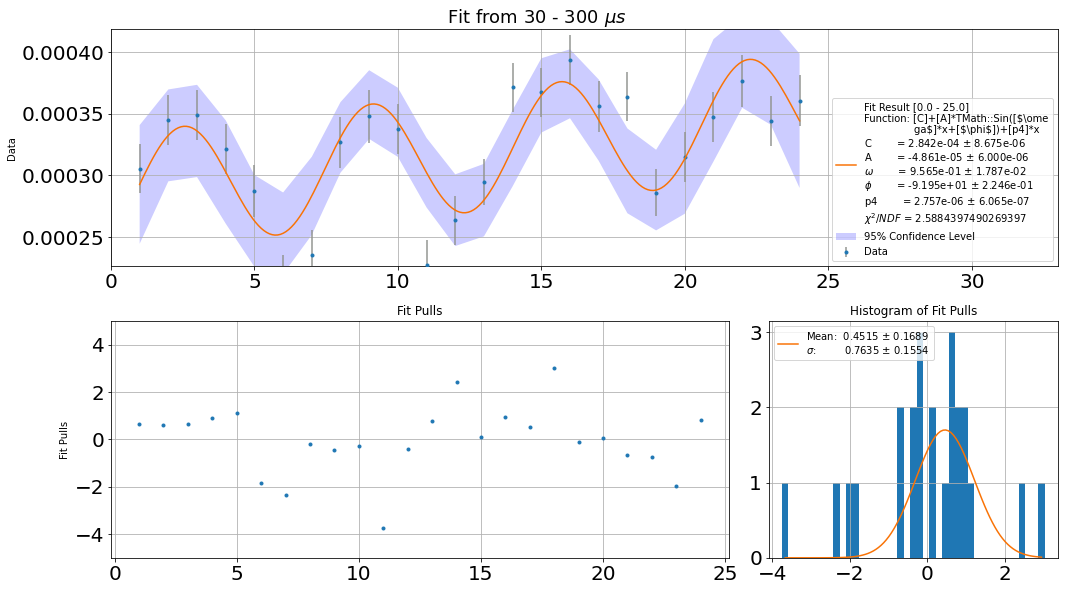

In [22]:
fig,ax = fit.draw(fmti=".")
#ax[0].set_ylim(0, 0.0002)
ax[1].set_ylim(-5,5)
ax[0].set_xlim(0,33)
plt.suptitle("Fit from "+str(tlow)+" - "+str(thigh)+r" $\mu s$",y=1.02, fontsize=18)
plt.show()